In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
print(dir(yf))

['Ticker', 'Tickers', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'base', 'cache', 'const', 'data', 'download', 'enable_debug_mode', 'exceptions', 'multi', 'scrapers', 'set_tz_cache_location', 'shared', 'ticker', 'tickers', 'utils', 'version', 'warnings']


In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("AAPL",start = "2020-01-01", end="2023-01-01")
data = data[["Close"]]

data['SMA10']= data["Close"].rolling(10).mean()
data['SMA30']= data["Close"].rolling(30).mean()
#creates new column
data['Signal']=0
data['Signal'][data['SMA10'] > data['SMA30']] = 1
#Ensures that a buy position is executed only 1 day after receiving signal
data['Position'] = data['Signal'].shift(1)
print(data)

/var/folders/5_/bm40kf4d429894td32s2r8_c0000gn/T/ipykernel_37005/846112269.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL",start = "2020-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

Price            Close       SMA10       SMA30 Signal Position
Ticker            AAPL                                        
Date                                                          
2020-01-02   72.620827         NaN         NaN      0      NaN
2020-01-03   71.914825         NaN         NaN      0      0.0
2020-01-06   72.487869         NaN         NaN      0      0.0
2020-01-07   72.146927         NaN         NaN      0      0.0
2020-01-08   73.307518         NaN         NaN      0      0.0
...                ...         ...         ...    ...      ...
2022-12-23  130.173782  135.089111  141.810050      0      0.0
2022-12-27  128.367188  133.661601  141.162769      0      0.0
2022-12-28  124.428207  131.743446  140.430916      0      0.0
2022-12-29  127.952568  130.400840  139.758625      0      0.0
2022-12-30  128.268478  129.752244  139.137999      0      0.0

[756 rows x 5 columns]



/var/folders/5_/bm40kf4d429894td32s2r8_c0000gn/T/ipykernel_37005/846112269.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['SMA10'] > data['SMA30']] = 1


In [18]:
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Position']* data['Market Return']
print(data['Strategy Return'])

Date
2020-01-02   NaN
2020-01-03   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
              ..
2022-12-23   NaN
2022-12-27   NaN
2022-12-28   NaN
2022-12-29   NaN
2022-12-30   NaN
Name: Strategy Return, Length: 756, dtype: float64


In [8]:
print((data['Signal'] == 1).any())

True


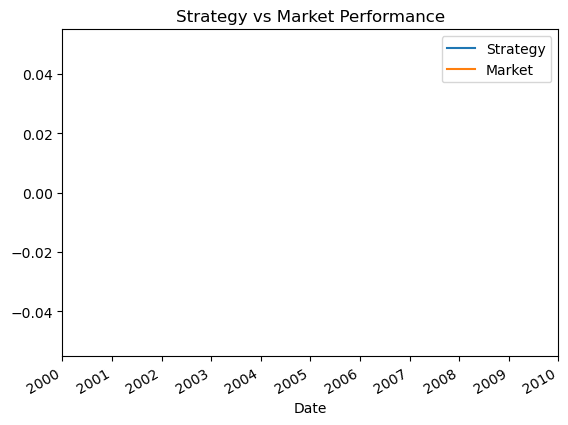

In [19]:
(1 + data['Strategy Return']).cumprod().plot(label='Strategy')
(1 + data['Market Return']).cumprod().plot(label='Market')
plt.legend()
plt.title("Strategy vs Market Performance")
plt.show()

/var/folders/5_/bm40kf4d429894td32s2r8_c0000gn/T/ipykernel_37005/1236731490.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL",start = "2020-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


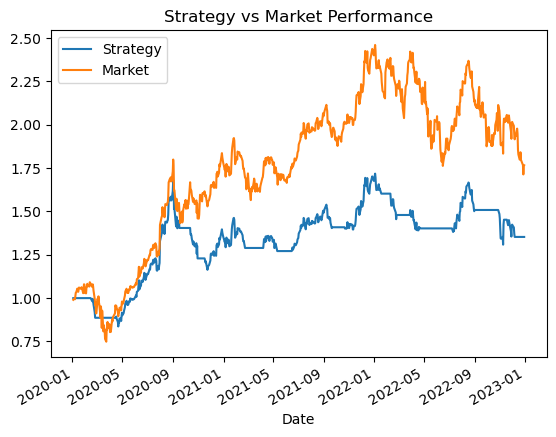

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("AAPL",start = "2020-01-01", end="2023-01-01")

data['SMA10'] = data['Close'].rolling(10).mean()
data['SMA30'] = data['Close'].rolling(30).mean()

data['Signal'] = 0
data.loc[data['SMA10'] > data['SMA30'], 'Signal'] = 1

data['Position'] = data['Signal'].shift(1)

data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Position'] * data['Market Return']

# Plotting
(1 + data['Strategy Return']).cumprod().plot(label='Strategy')
(1 + data['Market Return']).cumprod().plot(label='Market')
plt.legend()
plt.title("Strategy vs Market Performance")
plt.show()